In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as KMeans

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
x=data.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [30]:
from sklearn.cluster import KMeans

wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(x)
    wss.append(kmeans.inertia_)
print(wss)


[16.452698584325656, 9.571787788483807, 5.631082245078831, 4.105989072112405, 3.4897743160917987, 3.0609880059217947, 2.441185530517888, 1.9355837479613742, 1.6470511995673567, 1.4233837642912175]


Text(0, 0.5, 'wss')

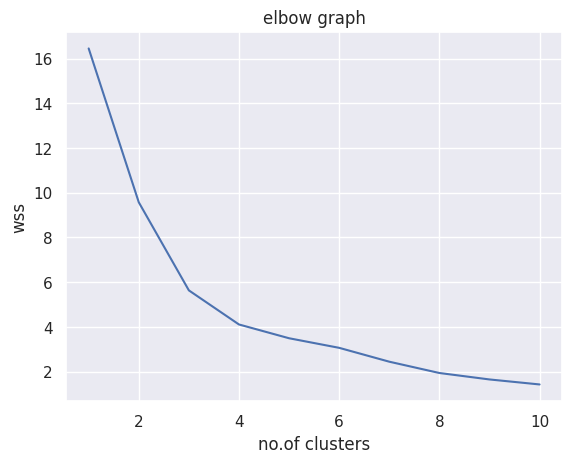

In [31]:
sns.set()
plt.plot(range(1,11),wss)
plt.title('elbow graph')
plt.xlabel('no.of clusters')
plt.ylabel('wss')

In [32]:
kmeans=KMeans(n_clusters=5 , init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[3 3 1 2 4 0 4 1 2 4 3 1 0 0 1 1 4 4 3 1 1 0 3 0 3 1 1 2 4 0 3 2 4 1 4 2 4
 3 4 1 0 0 4 1 2 2 1 0 2 1 0 0 3 2 0 2 0 1 2 2 0 2 3 3 0 4 0 0 1 0 3 3 3 4
 3 4 4 0 4 3 4 2 2 4 3 1 1 3 0 2 3 2 4 3 0 1 0 4 2 1]


Text(0, 0.5, 'spending score')

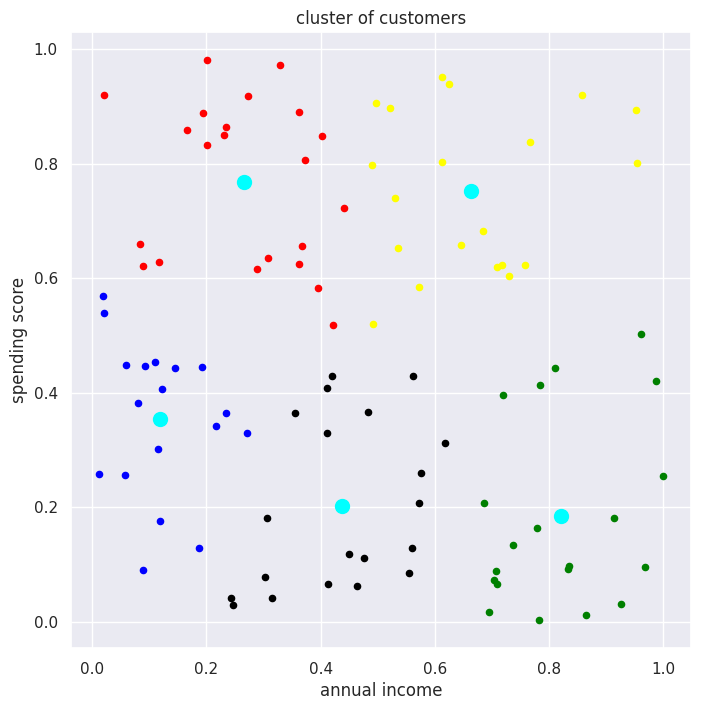

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=20 , c='red',label='cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=20 , c='green',label='cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=20 , c='blue',label='cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=20 , c='yellow',label='cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=20 , c='black',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100 , c='cyan')
plt.title('cluster of customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
